In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import math

In [2]:
# merging all the datasets into one
mergestorm_df = pd.concat( 
    map(pd.read_csv, ["resources/2009-2023/stormevents_2009.csv", "resources/2009-2023/stormevents_2010.csv", "resources/2009-2023/stormevents_2011.csv", 
                      "resources/2009-2023/stormevents_2012.csv", "resources/2009-2023/stormevents_2013.csv", "resources/2009-2023/stormevents_2014.csv",
                      "resources/2009-2023/stormevents_2015.csv", "resources/2009-2023/stormevents_2016.csv", "resources/2009-2023/stormevents_2017.csv",
                      "resources/2009-2023/stormevents_2018.csv", "resources/2009-2023/stormevents_2019.csv", "resources/2009-2023/stormevents_2020.csv",
                      "resources/2009-2023/stormevents_2021.csv", "resources/2009-2023/stormevents_2022.csv", "resources/2009-2023/stormevents_2023.csv"]),
                      ignore_index=True)
mergestorm_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200912,9,400,200912,9,1400,35732,206802,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong low pressure moved over the Cape Cod Ca...,A tree was downed in Pelham by heavy snow and ...,CSV
1,200901,18,300,200901,18,1700,25713,150209,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system in the Great Lakes redev...,Seven inches of snow fell in eastern Hillsboro...,CSV
2,200901,28,950,200901,28,2200,25704,150108,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong low pressure system moved through sou...,Nearly six inches of snow fell across eastern ...,CSV
3,200901,7,900,200901,7,2000,25707,150115,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,An eighth of an inch of ice and 2.6 inches of ...,CSV
4,200901,11,0,200901,11,1300,25710,150128,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,Eight inches of snow fell in eastern Hillsboro...,CSV


In [3]:
# Create a DataFrame with selected columns 
clean_mergestorm_df = mergestorm_df[["YEAR", 
                                     "STATE", 
                                     "EVENT_TYPE",  
                                     "INJURIES_DIRECT", 
                                     "INJURIES_INDIRECT",
                                     "DEATHS_DIRECT", 
                                     "DEATHS_INDIRECT",
                                     "DAMAGE_PROPERTY",
                                     "DAMAGE_CROPS", 
                                     "SOURCE", 
                                     "MAGNITUDE", 
                                     "MAGNITUDE_TYPE", 
                                     "TOR_F_SCALE", 
                                     "TOR_LENGTH",
                                     "TOR_WIDTH",
                                     "TOR_OTHER_CZ_STATE",
                                     "BEGIN_LOCATION", 
                                     "BEGIN_LAT", 
                                     "BEGIN_LON", 
                                     "END_LAT", 
                                     "END_LON", 
                                     "EPISODE_ID", 
                                     "EVENT_ID",]]
clean_mergestorm_df

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,5.00K,0.00K,Amateur Radio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35732,206802
1,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25713,150209
2,2009,NEW HAMPSHIRE,Winter Storm,0,0,0,0,0.00K,0.00K,Amateur Radio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25704,150108
3,2009,NEW HAMPSHIRE,Winter Storm,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25707,150115
4,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25710,150128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944441,2023,WEST VIRGINIA,Thunderstorm Wind,0,0,0,0,30.00K,NaN,Public,...,NaN,NaN,NaN,ROCKLAND,37.7300,-80.4900,37.7300,-80.4900,184917,1132425
944442,2023,NORTH CAROLINA,Thunderstorm Wind,0,0,0,0,100.00K,NaN,NWS Storm Survey,...,NaN,NaN,NaN,BENHAM,36.2700,-80.9000,36.2500,-80.8800,184946,1132953
944443,2023,NORTH CAROLINA,Lightning,0,0,0,0,10.00K,NaN,911 Call Center,...,NaN,NaN,NaN,FERGUSON,36.0928,-81.3304,36.0928,-81.3304,184992,1133070
944444,2023,NORTH CAROLINA,Lightning,0,0,0,0,10.00K,NaN,911 Call Center,...,NaN,NaN,NaN,CHAMPION,36.1316,-81.3075,36.1316,-81.3075,184992,1133072


In [5]:
# Converting NaN values to string "0.00K"
clean_mergestorm_df["DAMAGE_PROPERTY"] = clean_mergestorm_df["DAMAGE_PROPERTY"].fillna("0.00K")
clean_mergestorm_df["DAMAGE_CROPS"] = clean_mergestorm_df["DAMAGE_CROPS"].fillna("0.00K")

C:\Users\lnfme\AppData\Local\Temp\ipykernel_12400\1402119990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["DAMAGE_PROPERTY"] = clean_mergestorm_df["DAMAGE_PROPERTY"].fillna("0.00K")
C:\Users\lnfme\AppData\Local\Temp\ipykernel_12400\1402119990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["DAMAGE_CROPS"] = clean_mergestorm_df["DAMAGE_CROPS"].fillna("0.00K")


In [6]:
clean_mergestorm_df

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,5.00K,0.00K,Amateur Radio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35732,206802
1,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25713,150209
2,2009,NEW HAMPSHIRE,Winter Storm,0,0,0,0,0.00K,0.00K,Amateur Radio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25704,150108
3,2009,NEW HAMPSHIRE,Winter Storm,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25707,150115
4,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25710,150128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944441,2023,WEST VIRGINIA,Thunderstorm Wind,0,0,0,0,30.00K,0.00K,Public,...,NaN,NaN,NaN,ROCKLAND,37.7300,-80.4900,37.7300,-80.4900,184917,1132425
944442,2023,NORTH CAROLINA,Thunderstorm Wind,0,0,0,0,100.00K,0.00K,NWS Storm Survey,...,NaN,NaN,NaN,BENHAM,36.2700,-80.9000,36.2500,-80.8800,184946,1132953
944443,2023,NORTH CAROLINA,Lightning,0,0,0,0,10.00K,0.00K,911 Call Center,...,NaN,NaN,NaN,FERGUSON,36.0928,-81.3304,36.0928,-81.3304,184992,1133070
944444,2023,NORTH CAROLINA,Lightning,0,0,0,0,10.00K,0.00K,911 Call Center,...,NaN,NaN,NaN,CHAMPION,36.1316,-81.3075,36.1316,-81.3075,184992,1133072


In [8]:
# change a string into a float; account for magnitude of the number as represented in the string

def retype_damage_value(value):
    if pd.isna(value):
        return np.nan

    try:
        if isinstance(value, (int, float)):
            return float(value)

        value_str = str(value)
        if not value_str:
            return np.nan

        num_str = value[:-1]
        magnitude = value[-1]

        num = float(num_str)
        
        if magnitude == 'K':
            num *= 1000
        elif magnitude == 'M':
            num *= 1000000
        elif magnitude == 'B':
            num *= 1000000000
    
        return num
    except (ValueError, IndexError):
        return np.nan

In [9]:
# Applying function from previous cell

clean_mergestorm_df['DAMAGE_PROPERTY'] = clean_mergestorm_df['DAMAGE_PROPERTY'].apply(retype_damage_value)
clean_mergestorm_df['DAMAGE_CROPS'] = clean_mergestorm_df['DAMAGE_CROPS'].apply(retype_damage_value)

C:\Users\lnfme\AppData\Local\Temp\ipykernel_12400\2374613189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df['DAMAGE_PROPERTY'] = clean_mergestorm_df['DAMAGE_PROPERTY'].apply(retype_damage_value)
C:\Users\lnfme\AppData\Local\Temp\ipykernel_12400\2374613189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df['DAMAGE_CROPS'] = clean_mergestorm_df['DAMAGE_CROPS'].apply(retype_damage_value)


In [10]:
# display DataFrame
clean_mergestorm_df.head()

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,5000.0,0.0,Amateur Radio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35732,206802
1,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,0.0,0.0,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25713,150209
2,2009,NEW HAMPSHIRE,Winter Storm,0,0,0,0,0.0,0.0,Amateur Radio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25704,150108
3,2009,NEW HAMPSHIRE,Winter Storm,0,0,0,0,0.0,0.0,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25707,150115
4,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,0.0,0.0,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25710,150128


In [11]:
# Add new columns that combine direct/indirect deaths; direct/indirect injuries; property/crop damage

clean_mergestorm_df["TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
clean_mergestorm_df["TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
clean_mergestorm_df["TOTAL DAMAGES"] = clean_mergestorm_df["DAMAGE_PROPERTY"] + clean_mergestorm_df["DAMAGE_CROPS"]

clean_mergestorm_df

C:\Users\lnfme\AppData\Local\Temp\ipykernel_12400\1025980192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
C:\Users\lnfme\AppData\Local\Temp\ipykernel_12400\1025980192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
C:\Users\lnfme\AppData\Local\Temp\ipykernel_1240

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,5000.0,0.0,Amateur Radio,...,NaN,NaN,NaN,NaN,NaN,35732,206802,0,0,5000.0
1,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,0.0,0.0,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,25713,150209,0,0,0.0
2,2009,NEW HAMPSHIRE,Winter Storm,0,0,0,0,0.0,0.0,Amateur Radio,...,NaN,NaN,NaN,NaN,NaN,25704,150108,0,0,0.0
3,2009,NEW HAMPSHIRE,Winter Storm,0,0,0,0,0.0,0.0,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,25707,150115,0,0,0.0
4,2009,NEW HAMPSHIRE,Heavy Snow,0,0,0,0,0.0,0.0,Trained Spotter,...,NaN,NaN,NaN,NaN,NaN,25710,150128,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944441,2023,WEST VIRGINIA,Thunderstorm Wind,0,0,0,0,30000.0,0.0,Public,...,ROCKLAND,37.7300,-80.4900,37.7300,-80.4900,184917,1132425,0,0,30000.0
944442,2023,NORTH CAROLINA,Thunderstorm Wind,0,0,0,0,100000.0,0.0,NWS Storm Survey,...,BENHAM,36.2700,-80.9000,36.2500,-80.8800,184946,1132953,0,0,100000.0
944443,2023,NORTH CAROLINA,Lightning,0,0,0,0,10000.0,0.0,911 Call Center,...,FERGUSON,36.0928,-81.3304,36.0928,-81.3304,184992,1133070,0,0,10000.0
944444,2023,NORTH CAROLINA,Lightning,0,0,0,0,10000.0,0.0,911 Call Center,...,CHAMPION,36.1316,-81.3075,36.1316,-81.3075,184992,1133072,0,0,10000.0


In [12]:
# dropping columns that were combined in previous cell

drop_merged_df = clean_mergestorm_df.drop(columns=["INJURIES_DIRECT", 
                                                   "INJURIES_INDIRECT",
                                                   "DEATHS_DIRECT", 
                                                   "DEATHS_INDIRECT",
                                                   "DAMAGE_PROPERTY",
                                                   "DAMAGE_CROPS"])
drop_merged_df.head()

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2009,NEW HAMPSHIRE,Heavy Snow,Amateur Radio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35732,206802,0,0,5000.0
1,2009,NEW HAMPSHIRE,Heavy Snow,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25713,150209,0,0,0.0
2,2009,NEW HAMPSHIRE,Winter Storm,Amateur Radio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25704,150108,0,0,0.0
3,2009,NEW HAMPSHIRE,Winter Storm,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25707,150115,0,0,0.0
4,2009,NEW HAMPSHIRE,Heavy Snow,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25710,150128,0,0,0.0


In [13]:
# Narrow down events that have had at least one death and/or at least one injury 
narrow_df = drop_merged_df.loc[(drop_merged_df["TOTAL DEATHS"] > 1) | (drop_merged_df["TOTAL INJURIES"] > 1)]

# reset the index 
narrow_df.reset_index(drop=True, inplace=True)

# Display sample data
narrow_df.head()

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2009,WASHINGTON,Winter Weather,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34695,200257,0,2,0.0
1,2009,FLORIDA,Dense Fog,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34717,200360,0,4,0.0
2,2009,WISCONSIN,Winter Weather,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27303,160187,0,2,8000.0
3,2009,MINNESOTA,Winter Weather,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34484,199262,2,1,0.0
4,2009,HAWAII,Heavy Rain,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,WAILUA,20.8486,-156.1418,20.7526,-155.9884,34579,199743,2,0,0.0


In [14]:
# Reordering columns
reordernarrow_df = narrow_df[["YEAR", 
                              "STATE", 
                              "EVENT_TYPE", 
                              "TOTAL DEATHS", 
                              "TOTAL INJURIES", 
                              "TOTAL DAMAGES", 
                              "SOURCE", 
                              "MAGNITUDE", 
                              "MAGNITUDE_TYPE", 
                              "TOR_F_SCALE", 
                              "TOR_LENGTH", 
                              "TOR_WIDTH", 
                              "TOR_OTHER_CZ_STATE", 
                              "BEGIN_LOCATION", 
                              "BEGIN_LAT", 
                              "BEGIN_LON", 
                              "END_LAT", 
                              "END_LON", 
                              "EPISODE_ID", 
                              "EVENT_ID",]]
reordernarrow_df

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2009,WASHINGTON,Winter Weather,0,2,0.0,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34695,200257
1,2009,FLORIDA,Dense Fog,0,4,0.0,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34717,200360
2,2009,WISCONSIN,Winter Weather,0,2,8000.0,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27303,160187
3,2009,MINNESOTA,Winter Weather,2,1,0.0,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34484,199262
4,2009,HAWAII,Heavy Rain,2,0,0.0,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,WAILUA,20.8486,-156.1418,20.7526,-155.9884,34579,199743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,2023,ARIZONA,Excessive Heat,3,0,0.0,County Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183322,1125864
5092,2023,ARIZONA,Cold/Wind Chill,2,0,0.0,County Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178073,1083288
5093,2023,OKLAHOMA,Excessive Heat,0,45,0.0,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185199,1135128
5094,2023,TEXAS,Excessive Heat,0,806,0.0,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185154,1138728


In [18]:
# Saving as CSV file
reordernarrow_df.to_csv("reorder_narrow_df_2009-2023.csv")

In [17]:
# creating new DataFrame to show year and total deaths
year_deaths_df = reordernarrow_df[['YEAR', 'TOTAL DEATHS']]
year_deaths_df

,YEAR,TOTAL DEATHS
0,2009,0
1,2009,0
2,2009,0
3,2009,2
4,2009,2
...,...,...
5091,2023,3
5092,2023,2
5093,2023,0
5094,2023,0


In [18]:
# Using groupby that finds the sum of total deaths per year
combined_year_deaths_df = year_deaths_df.groupby('YEAR')['TOTAL DEATHS'].sum().reset_index()
combined_year_deaths_df

,YEAR,TOTAL DEATHS
0,2009,248
1,2010,327
2,2011,915
3,2012,401
4,2013,306
5,2014,269
6,2015,352
7,2016,354
8,2017,461
9,2018,623


In [25]:
# Determine if there are any potential outliers in total deaths between 2009 and 2023
quartiles = combined_year_deaths_df['TOTAL DEATHS'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of total deaths is: {lowerq}")
print(f"The upper quartile of total deaths is: {upperq}")
print(f"The interquartile range of total deaths is: {iqr}")
print(f"The the median of total deaths is: {quartiles[0.5]} ")
print(f"The mean of total deaths is: {np.mean(combined_year_deaths_df['TOTAL DEATHS'])}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_total_deaths = combined_year_deaths_df.loc[(combined_year_deaths_df['TOTAL DEATHS'] < lower_bound) | (combined_year_deaths_df['TOTAL DEATHS'] > upper_bound)]
outlier_total_deaths

The lower quartile of total deaths is: 327.5
The upper quartile of total deaths is: 589.5
The interquartile range of total deaths is: 262.0
The the median of total deaths is: 401.0 
The mean of total deaths is: 475.26666666666665
Values below -65.5 could be outliers.
Values above 982.5 could be outliers.


,YEAR,TOTAL DEATHS


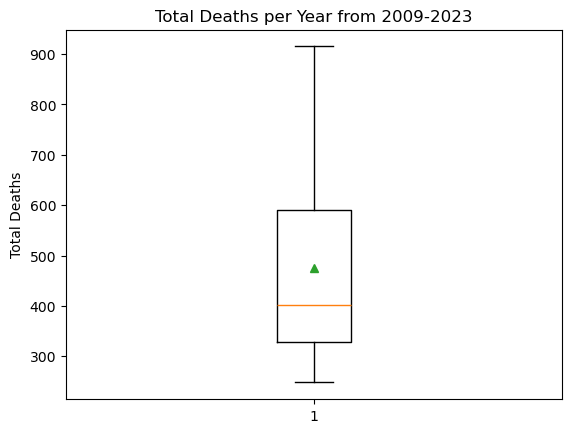

In [28]:
# Plotting the box and whisker plot
fig1, ax1 = plt.subplots()
ax1.set_title('Total Deaths per Year from 2009-2023')
ax1.set_ylabel('Total Deaths')
ax1.boxplot(combined_year_deaths_df['TOTAL DEATHS'], showmeans=True)
plt.savefig('box_whisker_2009-2023.png')
plt.show()